In [ ]:
!pip install skforecast


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00


In [ ]:
from skforecast.recursive import ForecasterRecursive


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1157: UserWarning: Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1157: UserWarning: Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1219: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


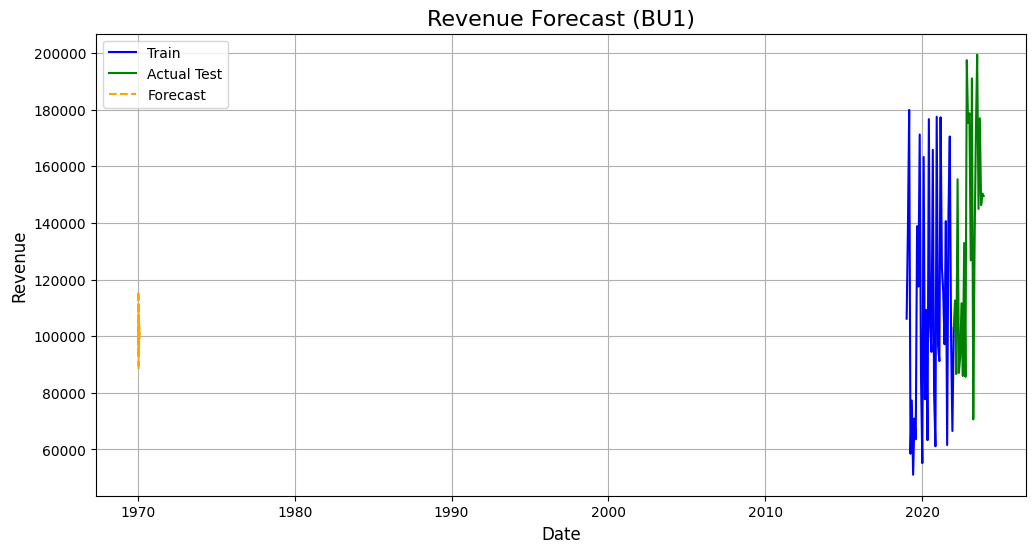

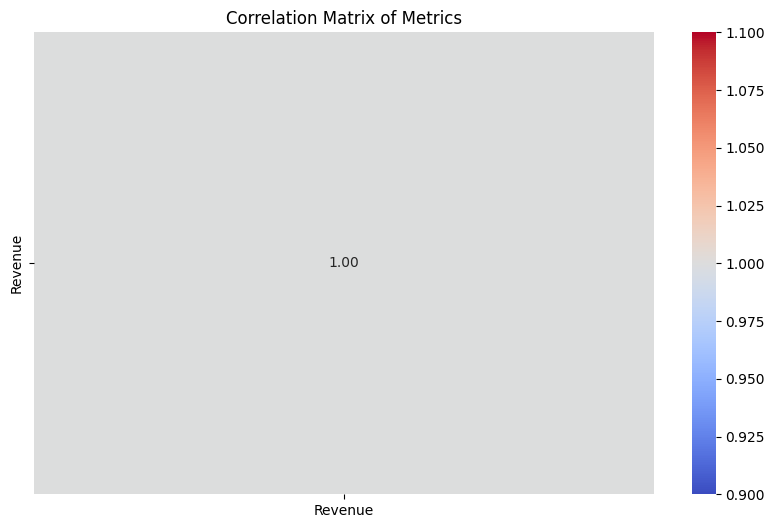

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from skforecast.recursive import ForecasterRecursive
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load the data
data = pd.read_excel("SaaS_FP&A_Data.xlsx")

# Filter for a specific business unit and metric for simplicity (e.g., Revenue for BU1)
data_filtered = data[data['Business Unit'] == 'BU1']
data_filtered = data_filtered[['Month', 'Revenue']]

# Convert the Month column to datetime and set as index
data_filtered['Month'] = pd.to_datetime(data_filtered['Month'])
data_filtered.set_index('Month', inplace=True)

# Sort the data by date
data_filtered.sort_index(inplace=True)

# Split data into train and test sets
split_date = '2022-01-01'
data_train = data_filtered[:split_date]
data_test = data_filtered[split_date:]

# Initialize the forecaster
forecaster = ForecasterRecursive(
    regressor=RandomForestRegressor(random_state=42),
    lags=12  # Use 12 lags (past 12 months) for prediction
)

# Train the forecaster
forecaster.fit(y=data_train['Revenue'])

# Make predictions
predictions = forecaster.predict(steps=len(data_test))

# Combine actuals and predictions for visualization
forecast_df = pd.DataFrame({'Actual': data_test['Revenue'].values, 'Predicted': predictions.values})
forecast_df.index = data_test.index

# Static Visualization: Matplotlib and Seaborn
plt.figure(figsize=(12, 6))
plt.plot(data_train.index, data_train['Revenue'], label='Train', color='blue')
plt.plot(data_test.index, data_test['Revenue'], label='Actual Test', color='green')
plt.plot(predictions.index, predictions, label='Forecast', color='orange', linestyle='--')
plt.title('Revenue Forecast (BU1)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Interactive Visualization: Plotly (Time Series)
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_train.index, y=data_train['Revenue'], mode='lines', name='Train', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data_test.index, y=data_test['Revenue'], mode='lines', name='Actual Test', line=dict(color='green')))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name='Forecast', line=dict(color='orange', dash='dash')))
fig.update_layout(
    title="Revenue Forecast (BU1)",
    xaxis_title="Date",
    yaxis_title="Revenue",
    legend=dict(x=0.1, y=0.9),
    template="plotly_white"
)
fig.show()

# Interactive Visualization: Plotly (Bar Comparison)
comparison_df = forecast_df.reset_index()
comparison_df['Month'] = comparison_df['Month'].dt.strftime('%Y-%m')
fig_bar = px.bar(
    comparison_df, x='Month', y=['Actual', 'Predicted'],
    barmode='group', title='Actual vs Predicted Revenue (BU1)',
    labels={'value': 'Revenue', 'Month': 'Date'}, template='plotly_white'
)
fig_bar.show()

# Correlation Heatmap (Insights)
plt.figure(figsize=(10, 6))
sns.heatmap(data_filtered.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Metrics')
plt.show()


In [ ]:
# Forecast for the next year (12 months)
future_steps = 12
future_predictions = forecaster.predict(steps=future_steps)

# Create a datetime index for the forecasted period
future_index = pd.date_range(start=data_test.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')

# Combine predictions into a DataFrame
future_forecast_df = pd.DataFrame({'Forecast': future_predictions.values}, index=future_index)

# Display the forecasted data
print(future_forecast_df)


                 Forecast
2024-01-31  102135.888951
2024-02-29   97639.939105
2024-03-31  115803.838036
2024-04-30  105884.721383
2024-05-31   92447.211905
2024-06-30  111684.803616
2024-07-31  110687.393540
2024-08-31   88312.086640
2024-09-30  100014.559255
2024-10-31  102644.668799
2024-11-30  107882.075751
2024-12-31  101056.653385


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1219: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

<ipython-input-9-578631cd42d5>:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



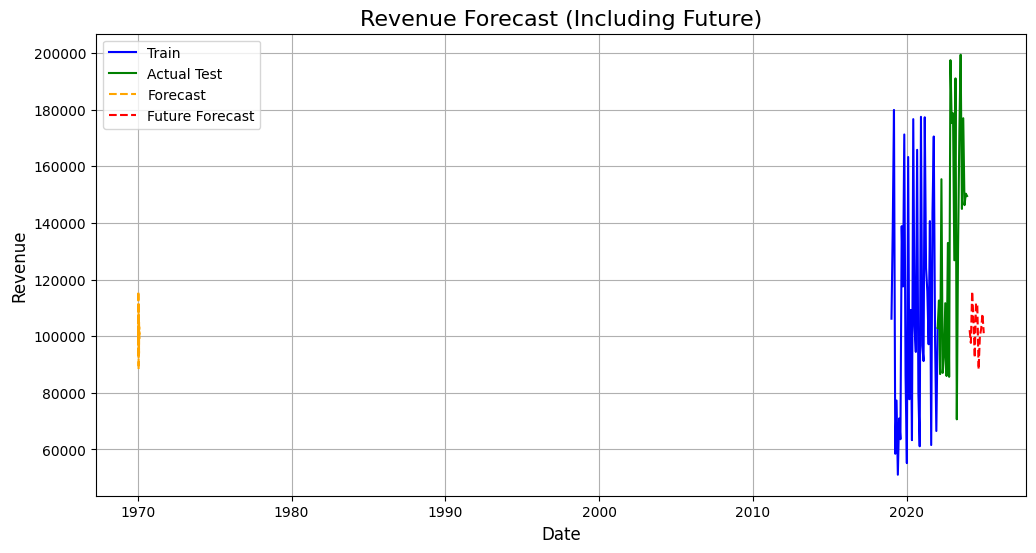

In [ ]:
import matplotlib.pyplot as plt

# Combine train, test, and future forecast for visualization
plt.figure(figsize=(12, 6))
plt.plot(data_train.index, data_train['Revenue'], label='Train', color='blue')
plt.plot(data_test.index, data_test['Revenue'], label='Actual Test', color='green')
plt.plot(predictions.index, predictions, label='Forecast', color='orange', linestyle='--')
plt.plot(future_forecast_df.index, future_forecast_df['Forecast'], label='Future Forecast', color='red', linestyle='--')
plt.title('Revenue Forecast (Including Future)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
